In [2]:
import pickle
from lightgbm import LGBMRegressor
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

xy_data_dir = '/Users/mmw/Documents/GitHub/ml_val/data_all/xy_data'

with open(xy_data_dir + '/x_q_0_1_tr.pkl', 'rb') as handle:
    x_tr = pickle.load(handle).iloc[:,5:]
    x_tr.replace([np.inf, -np.inf, 'inf', '-inf'], np.NaN, inplace=True)
    x_tr = x_tr.fillna(0).astype('float32')
    
with open(xy_data_dir + '/y_q_0_1_tr.pkl', 'rb') as handle:
    y_tr = pickle.load(handle).iloc[:,5:]
    y_tr.replace([np.inf, -np.inf, 'inf', '-inf'], np.NaN, inplace=True)
    y_tr = y_tr.fillna(0).astype('float32')
    
with open(xy_data_dir + '/x_q_0_1_ts.pkl', 'rb') as handle:
    x_ts = pickle.load(handle).iloc[:,5:]
    x_ts.replace([np.inf, -np.inf, 'inf', '-inf'], np.NaN, inplace=True)
    x_ts = x_ts.fillna(0).astype('float32')
    
with open(xy_data_dir + '/y_q_0_1_ts.pkl', 'rb') as handle:
    y_ts = pickle.load(handle).iloc[:,5:]
    y_ts.replace([np.inf, -np.inf, 'inf', '-inf'], np.NaN, inplace=True)
    y_ts = y_ts.fillna(0).astype('float32')

In [3]:
print(x_tr.shape, x_ts.shape)

(296436, 667) (163355, 667)


In [4]:
y_ts.iloc[:, 9:]

,,,niq,opepsq,oiadpq,oibdpq,piq,pbq,revtq_1o1,req_1o1,epspiq_1o1,quickq_1o1,...,cashrratq_1o1r,peq_1o1r,roeq_1o1r,roaq_1o1r,niq_1o1r,opepsq_1o1r,oiadpq_1o1r,oibdpq_1o1r,piq_1o1r,pbq_1o1r
permno,fyearq,fqtr,,,,,,,,,,,,,,,,,,,,,
10568.0,2005.0,1.0,-0.337000,-0.10,-0.177000,0.000000,-0.491000,1.140880,-0.041000,2.054000,0.24,1.275620,...,0.000000,4.893229,-0.905353,-0.726288,-0.695023,-0.655172,-0.820122,0.000000,-0.718625,0.613046
10656.0,2005.0,1.0,3.375000,0.21,4.085000,4.424000,4.613000,2.219423,9.513000,11.450000,-0.09,0.177486,...,0.000000,0.469928,0.031583,-0.083874,0.082078,-0.343750,-0.047786,0.000000,-0.007317,0.348615
10137.0,2005.0,1.0,43.901001,0.25,179.988998,256.399994,59.448002,2.040985,18.680000,-330.056000,0.05,-0.436358,...,-0.616681,0.284056,-0.440237,0.411832,0.271130,0.000000,0.066608,0.060661,0.047117,0.819047
10145.0,2005.0,1.0,358.000000,0.50,612.000000,770.000000,485.000000,2.776769,271.000000,898.000000,0.08,-0.242367,...,0.000000,-0.100685,0.004290,0.142005,0.213559,0.388889,0.238866,0.164902,0.197531,0.027023
10225.0,2005.0,1.0,152.699997,0.98,231.600006,286.799988,225.500000,3.588553,94.599998,617.799988,0.10,0.238405,...,0.000000,-0.042652,-0.012705,-0.048543,0.093057,0.152941,0.061898,0.032769,0.046890,-0.108000
10488.0,2005.0,1.0,-5.706000,0.41,1.082000,1.220000,-5.417000,0.747685,-0.230000,-3.701000,-4.13,-0.577033,...,0.000000,-1.054091,-38.796627,-13.063582,-10.042789,0.000000,-0.047535,-0.098300,-6.243950,-0.347473
10401.0,2005.0,1.0,529.000000,0.66,1070.000000,1706.000000,897.000000,2.024737,-975.000000,-6147.000000,0.28,0.014875,...,0.000000,-0.444565,0.895663,2.307564,0.740132,1.062500,1.165992,-0.021789,-8.352459,0.837138
10516.0,2005.0,1.0,266.296997,0.41,411.923004,579.369995,385.937012,1.406174,1004.508972,616.724976,0.18,0.023758,...,0.000000,-0.260696,0.057015,0.619171,0.773174,0.782609,0.855860,0.492872,0.773167,0.197060
10318.0,2005.0,1.0,2.568000,0.34,4.031000,4.701000,4.069000,3.328347,3.696000,8.092000,-0.03,1.381413,...,0.000000,-0.032411,0.809442,0.131262,0.414097,-0.081081,0.376708,0.223581,0.402620,0.094597


In [5]:
for index, item in enumerate(x_tr.columns):
    print(index, item)

0 absacc
1 acc
2 agr
3 bm_ia
4 cashdebt
5 cashpr
6 cfp
7 cfp_ia
8 chatoia
9 chcsho
10 chempia
11 chinv
12 chpmia
13 convind
14 depr
15 divi
16 divo
17 dy
18 egr
19 ep
20 grcapx
21 grltnoa
22 herf
23 hire
24 invest
25 lgr
26 mve_ia
27 orgcap
28 pchcapx_ia
29 pchcurrat
30 pchdepr
31 pchgm_pchsale
32 pchquick
33 pchsale_pchinvt
34 pchsale_pchrect
35 pchsale_pchxsga
36 pchsaleinv
37 pctacc
38 ps
39 rd
40 rd_mve
41 rd_sale
42 realestate
43 salecash
44 saleinv
45 salerec
46 secured
47 securedind
48 sgr
49 sin
50 sp
51 tang
52 tb
53 aeavol
54 cash
55 chtx
56 cinvest
57 ear
58 roavol
59 roeq
60 roaq
61 rsup
62 stdacc
63 stdcf
64 chmom
65 dolvol
66 mom12m
67 mom1m
68 mom36m
69 mom6m
70 mvel1
71 turn
72 revt
73 ebit
74 ebitda
75 re
76 epspi
77 gma
78 operprof
79 quick
80 currat
81 cashrrat
82 cftrr
83 dpr
84 pe
85 pb
86 roe
87 roa
88 roic
89 cod
90 capint
91 lev
92 dvc
93 gp
94 oancf
95 revt_1o1
96 ebit_1o1
97 ebitda_1o1
98 re_1o1
99 epspi_1o1
100 gma_1o1
101 operprof_1o1
102 quick_1o1
103 curra

In [6]:
list(y_tr.columns)

['revtq',
 'req',
 'epspiq',
 'quickq',
 'curratq',
 'cashrratq',
 'peq',
 'roeq',
 'roaq',
 'niq',
 'opepsq',
 'oiadpq',
 'oibdpq',
 'piq',
 'pbq',
 'revtq_1o1',
 'req_1o1',
 'epspiq_1o1',
 'quickq_1o1',
 'curratq_1o1',
 'cashrratq_1o1',
 'peq_1o1',
 'roeq_1o1',
 'roaq_1o1',
 'niq_1o1',
 'opepsq_1o1',
 'oiadpq_1o1',
 'oibdpq_1o1',
 'piq_1o1',
 'pbq_1o1',
 'revtq_1o1r',
 'req_1o1r',
 'epspiq_1o1r',
 'quickq_1o1r',
 'curratq_1o1r',
 'cashrratq_1o1r',
 'peq_1o1r',
 'roeq_1o1r',
 'roaq_1o1r',
 'niq_1o1r',
 'opepsq_1o1r',
 'oiadpq_1o1r',
 'oibdpq_1o1r',
 'piq_1o1r',
 'pbq_1o1r']

In [19]:
oosr2 = {}

def single_feature_oosr2(xitem, yitem, x_tr=x_tr, y_tr=y_tr, x_ts=x_ts, y_ts=y_ts, 
                         param_test = {'max_depth': [1]}):
    try:
        _ = x_tr[xitem].values.shape[1]
        x_tr_single = x_tr[xitem].values[:, 0].reshape(-1, 1)
        y_tr_single = y_tr[yitem].values
        x_ts_single = x_ts[xitem].values[:, 0].reshape(-1, 1)
        y_ts_single = y_ts[yitem].values
    
    except IndexError:
        x_tr_single = x_tr[xitem].values.reshape(-1, 1)
        y_tr_single = y_tr[yitem].values
        x_ts_single = x_ts[xitem].values.reshape(-1, 1)
        y_ts_single = y_ts[yitem].values 
    
    mod = LGBMRegressor(objective='regression_l2', zero_as_missing=True)
    clf = sklearn.model_selection.GridSearchCV(mod , param_grid = param_test, scoring='r2', cv=3)
    clf.fit(x_tr_single, y_tr_single)
    predictions = clf.predict(x_ts_single)

    return sklearn.metrics.r2_score(y_ts_single, predictions)

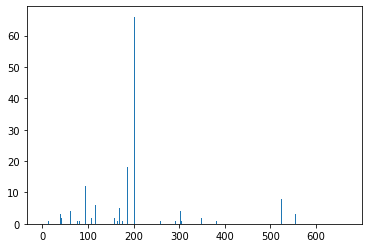

revtq_1o1 0.2714773703459178 0.3995010855759039 ['revtq_1o1_l0', 'revtq_1o1_l3', 'revtq_l3', 'revtq_l0', 'revt_1o1']
{'max_depth': 2, 'n_estimators': 100, 'num_leaves': 4}


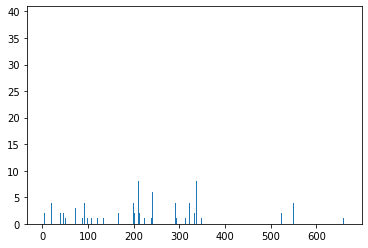

req_1o1 0.36789490698254756 0.5199193731367378 ['req_1o1_l0', 're_1o1', 'pb', 'oancf_1o1', 'gp']
{'max_depth': 2, 'n_estimators': 100, 'num_leaves': 4}


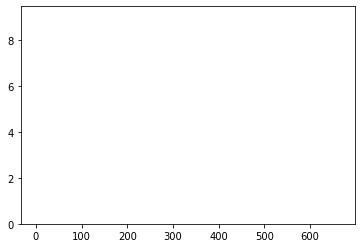

epspiq_1o1 0.06290780175245747 -4.890022403612672 ['epspiq_l3', 'opepsq_1o1_l2', 'epspiq_l0', 'epspiq_1o1_l3', 'epspiq_1o1_l0']
{'max_depth': 1, 'n_estimators': 20, 'num_leaves': 2}


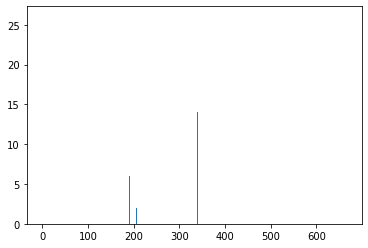

quickq_1o1 0.03283645633670629 0.2769435222253026 ['quickq_1o1_l0', 'quick_1o1', 'quickq_1o1_l3', 'curratq_l3', 'quickq_l3']
{'max_depth': 1, 'n_estimators': 100, 'num_leaves': 2}


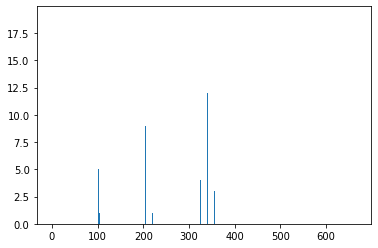

curratq_1o1 0.03428335635410462 0.31325590056555597 ['curratq_1o1_l0', 'curratq_l3', 'curratq_1o1_l3', 'currat_1o1', 'quickq_1o1_l0']
{'max_depth': 1, 'n_estimators': 100, 'num_leaves': 2}


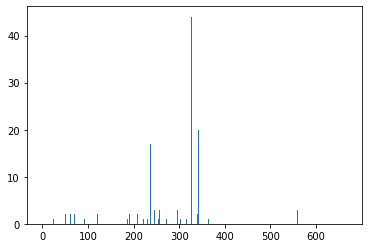

cashrratq_1o1 0.08277221068153229 0.37468978226607846 ['cashrratq_l3', 'cashrratq_1o1_l0', 'cashrratq_l0', 'cashrratq_1o1_l3', 'cashrratq_l2']
{'max_depth': 2, 'n_estimators': 100, 'num_leaves': 4}


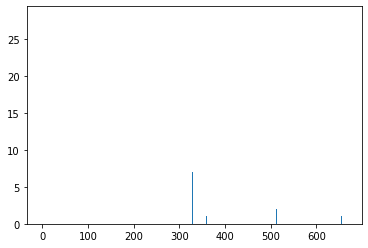

peq_1o1 0.004634398849409971 -141.2278379184753 ['peq_l3', 'peq_1o1_l3', 'roeq_l3', 'roaq_l3', 'peq_1o1r_l3']
{'max_depth': 2, 'n_estimators': 20, 'num_leaves': 4}


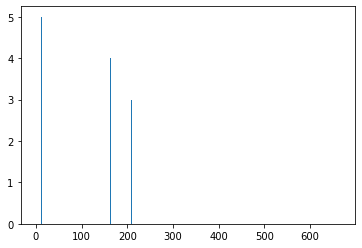

roeq_1o1 -6.563517891189363e-06 0.4093396679307597 ['chpmia', 'oancf_3o3r', 'roeq_1o1_l0', 'epspiq_l1', 'niq_l1']
{'max_depth': 1, 'n_estimators': 20, 'num_leaves': 2}


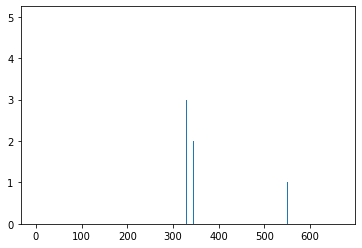

roaq_1o1 0.00040998744412834576 -0.0683300910044321 ['pb_1o1', 'pb_1o1r', 'roaq_l3', 'roa_1o1', 'roaq_1o1_l3']
{'max_depth': 1, 'n_estimators': 20, 'num_leaves': 2}


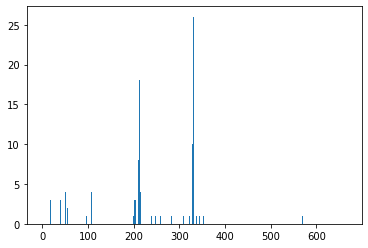

niq_1o1 0.15782280517260328 10.67423764874608 ['niq_l3', 'oiadpq_1o1_l0', 'mvel1', 'epspiq_l3', 'niq_1o1_l3']
{'max_depth': 2, 'n_estimators': 100, 'num_leaves': 4}


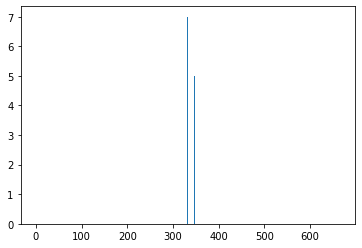

opepsq_1o1 0.05375248361496532 1.5917511816862986 ['opepsq_l3', 'opepsq_1o1_l3', 'epspiq_l0', 'epspiq_1o1_l0', 'opepsq_1o1_l0']
{'max_depth': 1, 'n_estimators': 20, 'num_leaves': 2}


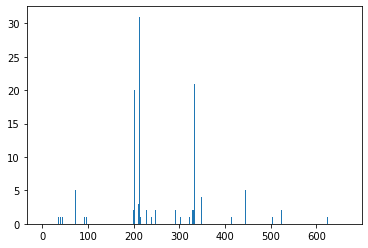

oiadpq_1o1 0.136804678664324 1.9442258933701413 ['oiadpq_1o1_l0', 'oiadpq_1o1_l3', 'ebit_1o1', 'oiadpq_l3', 'revtq_1o1_l0']
{'max_depth': 2, 'n_estimators': 100, 'num_leaves': 4}


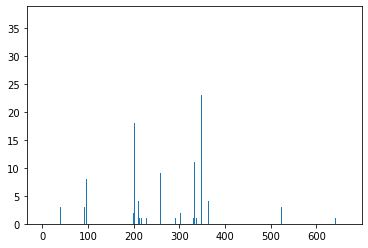

oibdpq_1o1 0.1283263401544703 1.4661188050267782 ['oibdpq_1o1_l0', 'oibdpq_1o1_l3', 'oiadpq_l0', 'revtq_1o1_l0', 'oibdpq_l3']
{'max_depth': 2, 'n_estimators': 100, 'num_leaves': 4}


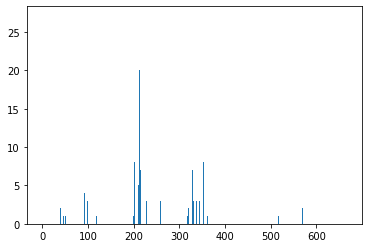

piq_1o1 0.16470186112586527 5.240044336285687 ['piq_l3', 'piq_1o1_l3', 'oiadpq_1o1_l0', 're_1o1', 'mvel1']
{'max_depth': 2, 'n_estimators': 100, 'num_leaves': 4}


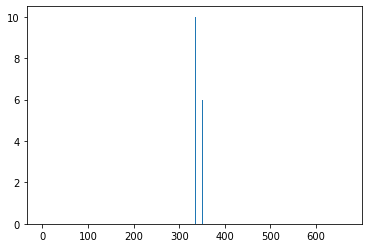

pbq_1o1 0.0002598277235382751 -6.858087608012777 ['pbq_l3', 'pbq_1o1_l3', 'pchcapx_ia', 'pbq_1o1r_l3', 'lev_f_med_5o5r']
{'max_depth': 1, 'n_estimators': 20, 'num_leaves': 2}


In [22]:
# level prediction

for item in y_tr.columns:
    if not ('_1o1' in item and '_1o1r' not in item):
        continue    
    param_test = {'max_depth': [1, 2], 'num_leaves': [2, 4], 'n_estimators': [20, 100]}
    mod = LGBMRegressor(objective='regression_l2', zero_as_missing=True)
    clf = sklearn.model_selection.GridSearchCV(mod , param_grid = param_test, scoring='r2', cv=3)
    clf.fit(x_tr.values, y_tr[item].values)
    predictions = clf.predict(x_ts.values)
    y_true = y_ts[item].values 
    plt.bar(range(len(clf.best_estimator_.feature_importances_)), clf.best_estimator_.feature_importances_)
    plt.show()
    max_fea = []
    max_5 = clf.best_estimator_.feature_importances_.argsort()[-5:][::-1]
    for index in max_5:
        max_fea.append(x_tr.columns[index])
    oosr2[item] = sklearn.metrics.r2_score(y_true, predictions)
    try:
        sig_feature_oosr2 = single_feature_oosr2(item + '_l0', item, param_test=param_test)
        enhancement = (oosr2[item] - sig_feature_oosr2)/sig_feature_oosr2
        print(item, oosr2[item], enhancement, max_fea)
        print(clf.best_params_)
    except KeyError:
        print(item, oosr2[item], max_fea)
        print(clf.best_params_)

In [ ]:
# rate prediction

for item in y_tr.columns:
    if '_1o1r' not in item:
        continue    
    param_test = {'max_depth': [1, 2], 'num_leaves': [2, 4], 'n_estimators': [20, 100]}
    mod = LGBMRegressor(objective='regression_l2', zero_as_missing=True)
    clf = sklearn.model_selection.GridSearchCV(mod , param_grid = param_test, scoring='r2', cv=3)
    clf.fit(x_tr.values, y_tr[item].values)
    predictions = clf.predict(x_ts.values)
    y_true = y_ts[item].values 
    plt.bar(range(len(clf.best_estimator_.feature_importances_)), clf.best_estimator_.feature_importances_)
    plt.show()
    max_fea = []
    max_5 = clf.best_estimator_.feature_importances_.argsort()[-5:][::-1]
    for index in max_5:
        max_fea.append(x_tr.columns[index])
    oosr2[item] = sklearn.metrics.r2_score(y_true, predictions)
    try:
        sig_feature_oosr2 = single_feature_oosr2(item + '_l0', item, param_test=param_test)
        enhancement = (oosr2[item] - sig_feature_oosr2)/sig_feature_oosr2
        print(item, oosr2[item], enhancement, max_fea)
        print(clf.best_params_)
    except KeyError:
        print(item, oosr2[item], max_fea)
        print(clf.best_params_)